<a href="https://colab.research.google.com/github/ahoucbvtw/CNN-Kaggle-Pratice/blob/main/Bees_Wasps_Insect_Other.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
path = "drive/My Drive/Kaggle-Pratice/beeorwasp/archive.zip"
f = zipfile.ZipFile(path)
f.extractall("beewasp")

In [ ]:
import pandas as pd
import os
import shutil
# import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 建立答案的數字轉換
trans = [
        "Bee",										
        "Insect",										
        "Other",										
        "Wasp"
]

In [ ]:
df = pd.read_csv("beewasp/kaggle_bee_vs_wasp/labels.csv")
df

id  ...  label
0          1  ...    bee
1          2  ...    bee
2          3  ...    bee
3          4  ...    bee
4          5  ...    bee
...      ...  ...    ...
11416  11417  ...  other
11417  11418  ...  other
11418  11419  ...  other
11419  11420  ...  other
11420  11421  ...  other

[11421 rows x 10 columns]

In [ ]:
path = ["beewasp/kaggle_bee_vs_wasp/bee1", 
        "beewasp/kaggle_bee_vs_wasp/bee2", 
        "beewasp/kaggle_bee_vs_wasp/wasp1", 
        "beewasp/kaggle_bee_vs_wasp/wasp2",
        "beewasp/kaggle_bee_vs_wasp/other_insect",
        "beewasp/kaggle_bee_vs_wasp/other_noinsect"]

In [ ]:
# 利用DataSet提供者提供的labels.csv製作最後驗證模型的數據df
final_validation_path = []
final_validation_answer = []
for i,s in enumerate(df["path"]):
    if df["is_final_validation"][i] == 1:
        if s.split("\\")[0] == "bee1":
            final_validation_path.append(path[0] + "/" + s.split("\\")[1])
            final_validation_answer.append(0)

        elif s.split("\\")[0] == "bee2":
            final_validation_path.append(path[1] + "/" + s.split("\\")[1])
            final_validation_answer.append(0)

        elif s.split("\\")[0] == "wasp1":
            final_validation_path.append(path[2] + "/" + s.split("\\")[1])
            final_validation_answer.append(3)

        elif s.split("\\")[0] == "wasp2":
            final_validation_path.append(path[3] + "/" + s.split("\\")[1])
            final_validation_answer.append(3)

        elif s.split("\\")[0] == "other_insect":
            final_validation_path.append(path[4] + "/" + s.split("\\")[1])
            final_validation_answer.append(1)

        elif s.split("\\")[0] == "other_noinsect":
            final_validation_path.append(path[5] + "/" + s.split("\\")[1])
            final_validation_answer.append(2)

final_validation = pd.DataFrame({
    "path": final_validation_path,
    "answer": final_validation_answer
})

final_validation

path  answer
0     beewasp/kaggle_bee_vs_wasp/bee1/10024864894_6d...       0
1     beewasp/kaggle_bee_vs_wasp/bee1/1011948979_fc3...       0
2     beewasp/kaggle_bee_vs_wasp/bee1/1044467943_594...       0
3     beewasp/kaggle_bee_vs_wasp/bee1/1154438668_037...       0
4     beewasp/kaggle_bee_vs_wasp/bee1/11609248916_80...       0
...                                                 ...     ...
1758  beewasp/kaggle_bee_vs_wasp/other_noinsect/5812...       2
1759  beewasp/kaggle_bee_vs_wasp/other_noinsect/5816...       2
1760  beewasp/kaggle_bee_vs_wasp/other_noinsect/5817...       2
1761  beewasp/kaggle_bee_vs_wasp/other_noinsect/5818...       2
1762  beewasp/kaggle_bee_vs_wasp/other_noinsect/6778...       2

[1763 rows x 2 columns]

In [ ]:
# final_validation.to_csv("f.csv", index = False)

In [ ]:
# 利用DataSet提供者提供的labels.csv製作train模型的數據df
train_pathdf = []
train_answerdf = []

for i,s in enumerate(df["path"]):
    if df["is_final_validation"][i] == 0:
        if s.split("\\")[0] == "bee1":
            train_pathdf.append(path[0] + "/" + s.split("\\")[1])
            train_answerdf.append(0)

        elif s.split("\\")[0] == "bee2":
            train_pathdf.append(path[1] + "/" + s.split("\\")[1])
            train_answerdf.append(0)

        elif s.split("\\")[0] == "wasp1":
            train_pathdf.append(path[2] + "/" + s.split("\\")[1])
            train_answerdf.append(3)

        elif s.split("\\")[0] == "wasp2":
            train_pathdf.append(path[3] + "/" + s.split("\\")[1])
            train_answerdf.append(3)

        elif s.split("\\")[0] == "other_insect":
            train_pathdf.append(path[4] + "/" + s.split("\\")[1])
            train_answerdf.append(1)

        elif s.split("\\")[0] == "other_noinsect":
            train_pathdf.append(path[5] + "/" + s.split("\\")[1])
            train_answerdf.append(2)

train_df = pd.DataFrame({
    "path": train_pathdf,
    "answer": train_answerdf
})

train_df

path  answer
0     beewasp/kaggle_bee_vs_wasp/bee1/10007154554_02...       0
1     beewasp/kaggle_bee_vs_wasp/bee1/10092043833_73...       0
2     beewasp/kaggle_bee_vs_wasp/bee1/10128235063_dc...       0
3     beewasp/kaggle_bee_vs_wasp/bee1/10130729734_f6...       0
4     beewasp/kaggle_bee_vs_wasp/bee1/10166485783_9c...       0
...                                                 ...     ...
9653  beewasp/kaggle_bee_vs_wasp/other_noinsect/5812...       2
9654  beewasp/kaggle_bee_vs_wasp/other_noinsect/5814...       2
9655  beewasp/kaggle_bee_vs_wasp/other_noinsect/5816...       2
9656  beewasp/kaggle_bee_vs_wasp/other_noinsect/5818...       2
9657  beewasp/kaggle_bee_vs_wasp/other_noinsect/9695...       2

[9658 rows x 2 columns]

In [ ]:
from sklearn.model_selection import train_test_split
# x, y = np.array(train_df["path"]), np.array(train_df["answer"])
x_train, x_test, y_train, y_test = train_test_split(train_df["path"], train_df["answer"], test_size=0.1, random_state=5566)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8692,)
(966,)
(8692,)
(966,)


In [ ]:
x_train[0]

'beewasp/kaggle_bee_vs_wasp/bee1/10007154554_026417cfd0_n.jpg'

beewasp/kaggle_bee_vs_wasp/other_insect/6296608506_635c9ca14d_m.jpg
答案: Insect
(224, 224, 3)


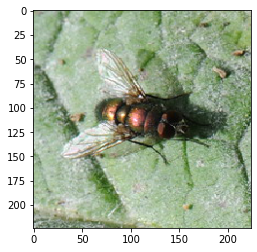

In [ ]:
# 純粹顯示圖片看train_df的路徑和答案是否有批配
import random
from tensorflow.keras.preprocessing.image import load_img

img_size = 224

index = random.randint(0, x_train.shape[0])
print(x_train[index])
print("答案:", trans[y_train[index]])
img = load_img(x_train[index], target_size = (img_size,img_size))
img = np.array(img)
print(img.shape)
plt.imshow(img)

In [ ]:
path_Train = "./Training"
path_Test = "./Testing"

# 如果資料夾不存在就建立
if not os.path.isdir(path_Train):  
    os.mkdir(path_Train)

if not os.path.isdir(path_Test):  
    os.mkdir(path_Test)

# 在path_Train和path_Test底下檢查並建立4種分類的新資料夾
train_bee_dir = os.path.join(path_Train, "bee")
train_wasp_dir = os.path.join(path_Train, "wasp")
train_insect_dir = os.path.join(path_Train, "insect")
train_other_dir = os.path.join(path_Train, "other")

test_bee_dir = os.path.join(path_Test, "bee")
test_wasp_dir = os.path.join(path_Test, "wasp")
test_insect_dir = os.path.join(path_Test, "insect")
test_other_dir = os.path.join(path_Test, "other")

if not os.path.isdir(train_bee_dir):  
    os.mkdir(train_bee_dir)

if not os.path.isdir(train_wasp_dir):  
    os.mkdir(train_wasp_dir)

if not os.path.isdir(train_insect_dir):  
    os.mkdir(train_insect_dir)

if not os.path.isdir(train_other_dir):  
    os.mkdir(train_other_dir)

if not os.path.isdir(test_bee_dir):  
    os.mkdir(test_bee_dir)

if not os.path.isdir(test_wasp_dir):  
    os.mkdir(test_wasp_dir)

if not os.path.isdir(test_insect_dir):  
    os.mkdir(test_insect_dir)

if not os.path.isdir(test_other_dir):  
    os.mkdir(test_other_dir)


In [ ]:
# 將隨機分類好的x_train和x_test內的圖片複製一份至path_Train和path_Test底下的4種分類資料夾內以供下面的圖片產生器使用
for move in x_train:
    if move.split("/")[2] == "bee1":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{train_bee_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

    elif move.split("/")[2] == "bee2":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{train_bee_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

    elif move.split("/")[2] == "wasp1":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{train_wasp_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

    elif move.split("/")[2] == "wasp2":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{train_wasp_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

    elif move.split("/")[2] == "other_insect":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{train_insect_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

    elif move.split("/")[2] == "other_noinsect":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{train_other_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)


for move in x_test:
    if move.split("/")[2] == "bee1":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{test_bee_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

    elif move.split("/")[2] == "bee2":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{test_bee_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

    elif move.split("/")[2] == "wasp1":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{test_wasp_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

    elif move.split("/")[2] == "wasp2":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{test_wasp_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

    elif move.split("/")[2] == "other_insect":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{test_insect_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

    elif move.split("/")[2] == "other_noinsect":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{test_other_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

In [ ]:
print(len(os.listdir(train_wasp_dir)))
print(len(os.listdir(train_bee_dir)))
print(len(os.listdir(train_insect_dir)))
print(len(os.listdir(train_other_dir)))

3765
2410
1853
664


In [ ]:
print(3784/8692)
print(2415/8692)
print(1846/8692)
print(647/8692)

0.4353428439944777
0.27784169351127475
0.21237919926369075
0.07443626323055684


In [ ]:
path_final = "./Final"

# 如果資料夾不存在就建立
if not os.path.isdir(path_final):  
    os.mkdir(path_final)


# 在path_final底下檢查並建立4種分類的新資料夾
final_bee_dir = os.path.join(path_final, "bee")
final_wasp_dir = os.path.join(path_final, "wasp")
final_insect_dir = os.path.join(path_final, "insect")
final_other_dir = os.path.join(path_final, "other")

if not os.path.isdir(final_bee_dir):  
    os.mkdir(final_bee_dir)

if not os.path.isdir(final_wasp_dir):  
    os.mkdir(final_wasp_dir)

if not os.path.isdir(final_insect_dir):  
    os.mkdir(final_insect_dir)

if not os.path.isdir(final_other_dir):  
    os.mkdir(final_other_dir)

In [ ]:
# 將分類好的final_validation內的圖片複製一份至path_final底下的4種分類資料夾內以供下面的圖片產生器使用
for move in final_validation["path"]:
    if move.split("/")[2] == "bee1":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{final_bee_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

    elif move.split("/")[2] == "bee2":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{final_bee_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

    elif move.split("/")[2] == "wasp1":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{final_wasp_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

    elif move.split("/")[2] == "wasp2":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{final_wasp_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

    elif move.split("/")[2] == "other_insect":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{final_insect_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)

    elif move.split("/")[2] == "other_noinsect":
        pic = move.split("/")[3]
        old_pic_path = f"./{move}"
        new_pic_path = f"{final_other_dir}/{pic}"
        shutil.copyfile(old_pic_path, new_pic_path)


In [ ]:
# shutil.rmtree('./Training')

In [ ]:
# 圖片預處理(製作Python產生器)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 製作一產生器將圖片Normalize
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# train_generator = train_datagen.flow_from_directory(
#         path_Train,
#         target_size = (224, 224),
#         batch_size = 20,
#         class_mode = 'categorical',
#         shuffle=True,
#         seed = 20)

# test_generator = test_datagen.flow_from_directory(
#         path_Test,
#         target_size = (224, 224),
#         batch_size = 20,
#         class_mode = 'categorical',
#         shuffle=True,
#         seed = 20)

train_generator = train_datagen.flow_from_directory(
        path_Train,
        target_size = (224, 224),
        batch_size = 20,
        class_mode = 'categorical',
        )

test_generator = test_datagen.flow_from_directory(
        path_Test,
        target_size = (224, 224),
        batch_size = 20,
        class_mode = 'categorical',
        )

Found 8692 images belonging to 4 classes.
Found 966 images belonging to 4 classes.


In [ ]:
# 製作一final產生器將圖片Normalize
final_datagen = ImageDataGenerator(rescale = 1./255)

final_generator = final_datagen.flow_from_directory(
        path_final,
        target_size = (224, 224),
        batch_size = 20,
        class_mode = 'categorical')

Found 1763 images belonging to 4 classes.


In [ ]:
final_generator.classes

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

https://www.itdaan.com/tw/47241f7baf5c6d9f023bc82ecdfc2b08

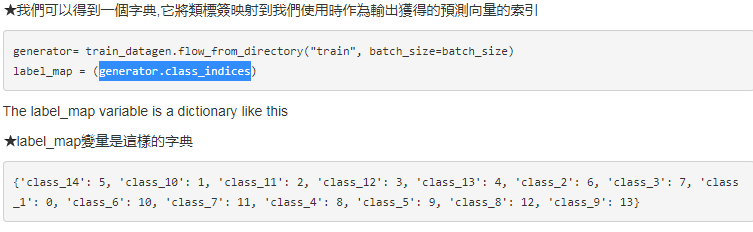

In [ ]:
label_map = (final_generator.class_indices)
label_map

{'bee': 0, 'insect': 1, 'other': 2, 'wasp': 3}

In [ ]:
# 建立CNN網路層
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

layers = [
          Conv2D(32, 3, padding = "same", activation = "relu", input_shape = (224, 224, 3)),
          Conv2D(64, 3, padding = "same", activation = "relu"),
          Conv2D(128, 3, padding = "same", activation = "relu"),
          MaxPooling2D(),
          Conv2D(256, 3, padding = "same", activation = "relu"),
          MaxPooling2D(),
          Conv2D(512, 3, padding = "same", activation = "relu"),
          MaxPooling2D(),
          Conv2D(1024, 3, padding = "same", activation = "relu"),
          MaxPooling2D(),
          Conv2D(2048, 3, padding = "same", activation = "relu"),
          GlobalAveragePooling2D(),
          Dense(100, activation="relu"),
          Dropout(0.25),
          Dense(10, activation="relu"),
          Dense(4, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 128)     73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 256)     295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 256)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 512)       1

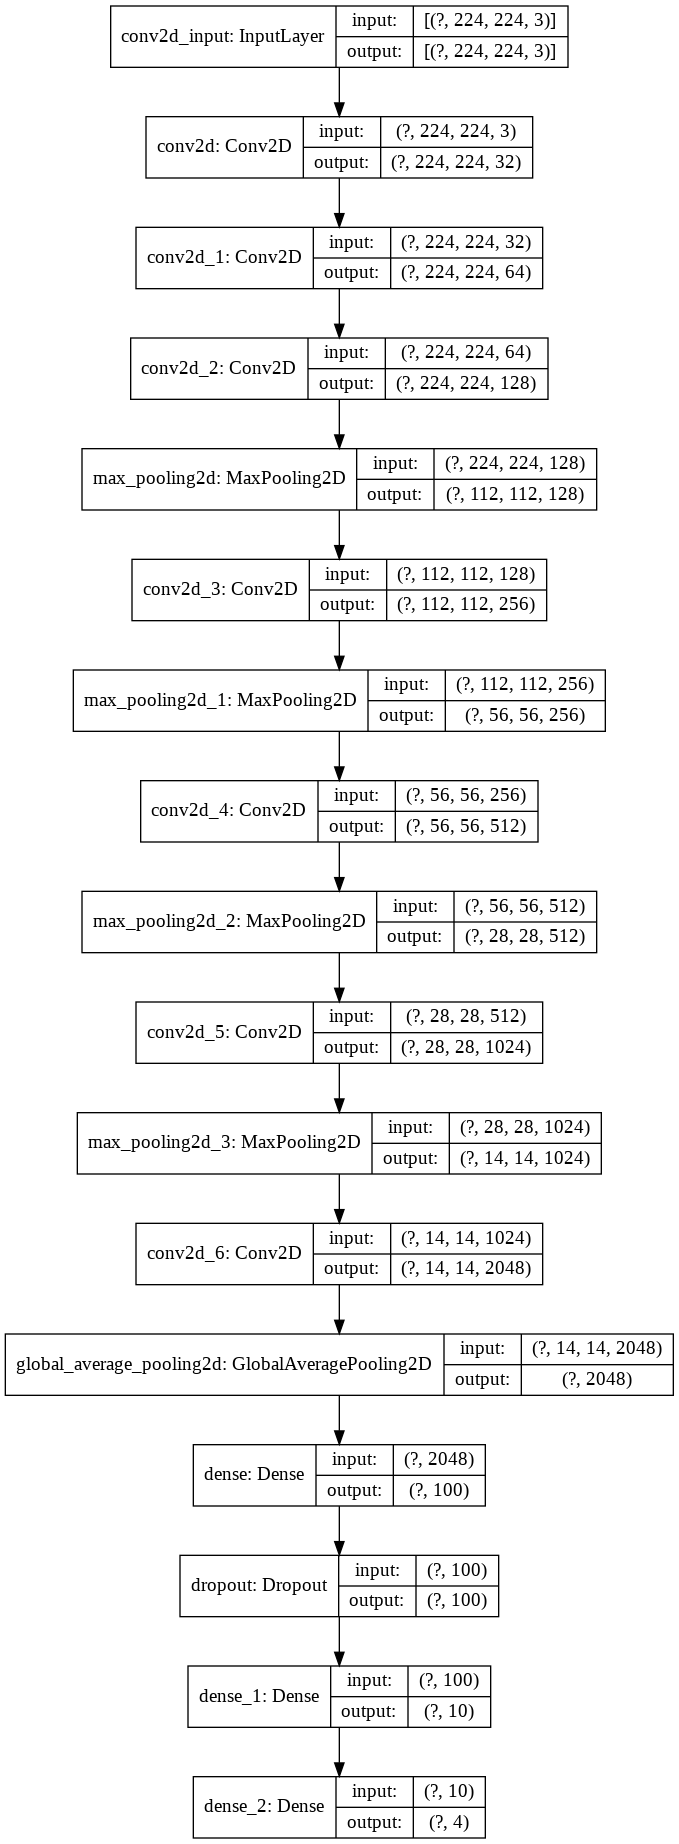

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

https://stackoverflow.com/questions/49161174/tensorflow-logits-and-labels-must-have-the-same-first-dimension

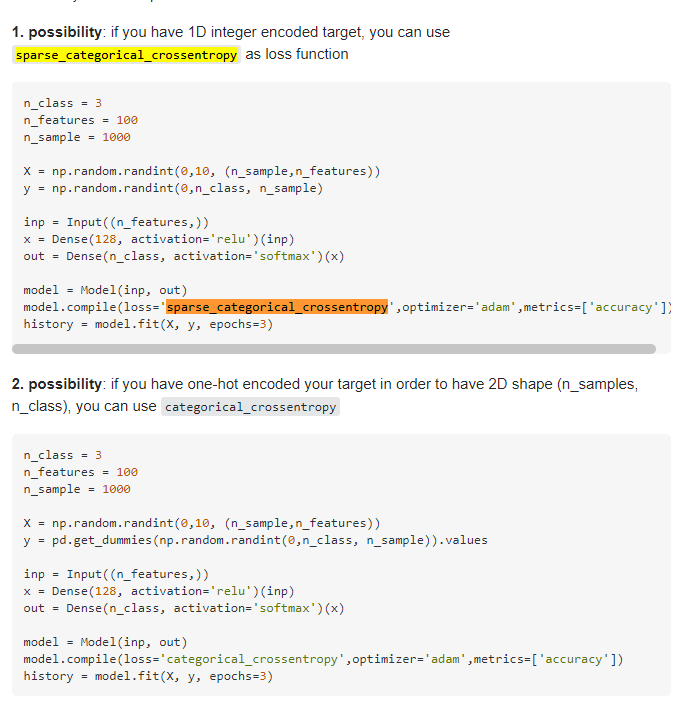

In [ ]:
# model comple
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [ ]:
# Training
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint("drive/My Drive/Kaggle-Pratice/beeorwasp/Bee_Wasp.h5", save_best_only=True),
    EarlyStopping(patience = 20, restore_best_weights=True)
]

loss = model.fit_generator(train_generator,
                    steps_per_epoch = 435,
                    epochs = 300,
                    verbose = 2,
                    validation_data = test_generator,
                    validation_steps = 49,
                    callbacks = callbacks)


# loss = model.fit(x = train_generator,
#                  steps_per_epoch = 435,
#                  epochs = 150,
#                  verbose = 1,
#                  validation_data = test_generator,
#                  validation_steps = 49,
#                  callbacks = callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/300
435/435 - 348s - loss: 1.1557 - accuracy: 0.5107 - val_loss: 1.0722 - val_accuracy: 0.5424
Epoch 2/300
435/435 - 341s - loss: 1.0299 - accuracy: 0.5760 - val_loss: 0.9980 - val_accuracy: 0.5787
Epoch 3/300
435/435 - 338s - loss: 0.9908 - accuracy: 0.5908 - val_loss: 1.0534 - val_accuracy: 0.5870
Epoch 4/300
435/435 - 343s - loss: 0.9239 - accuracy: 0.6101 - val_loss: 0.9252 - val_accuracy: 0.6242
Epoch 5/300
435/435 - 344s - loss: 0.8474 - accuracy: 0.6340 - val_loss: 0.8353 - val_accuracy: 0.6335
Epoch 6/300
435/435 - 344s - loss: 0.7915 - accuracy: 0.6802 - val_loss: 0.7494 - val_accuracy: 0.7174
Epoch 7/300
435/435 - 339s - loss: 0.7451 - accuracy: 0.7025 - val_loss: 0.7538 - val_accuracy: 0.7257
Epoch 8/300
435/435 - 344s - loss: 0.7151 - accuracy: 0.7203 - val_loss: 0.6834 - val_accuracy: 0.7391
Epoch 9/300
435/435 - 344s - loss: 0.6871 - accuracy: 0.7300 - val_loss: 0.6567 - val_accuracy: 0.75

3


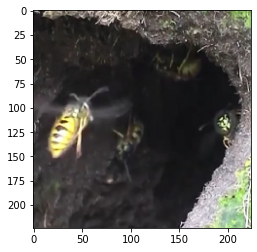

1


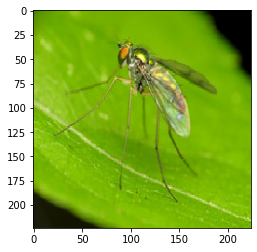

1


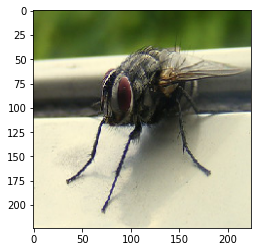

2


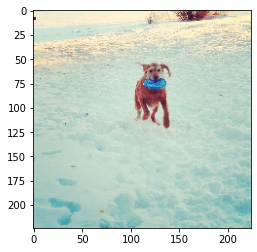

0


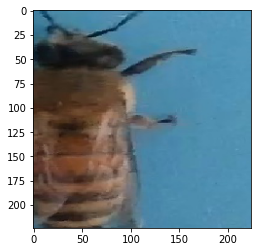

0


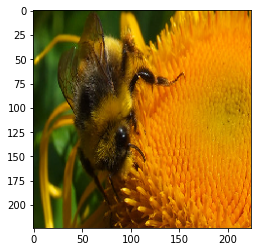

3


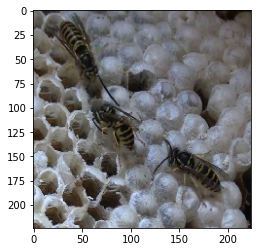

0


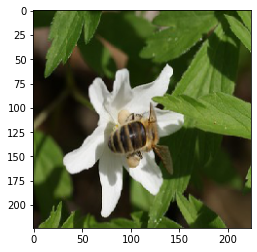

1


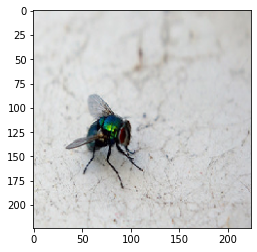

1


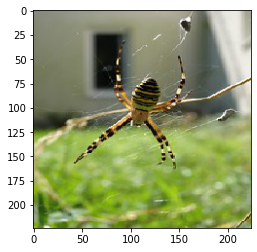

0


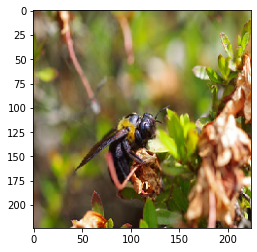

3


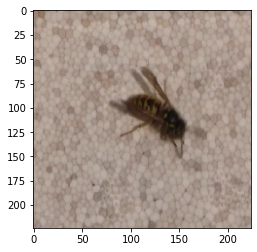

3


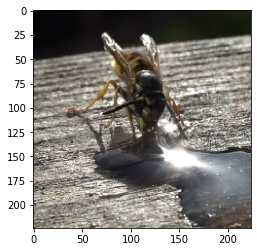

3


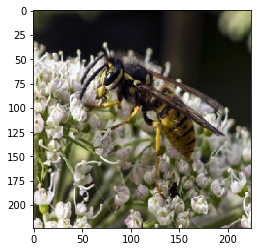

2


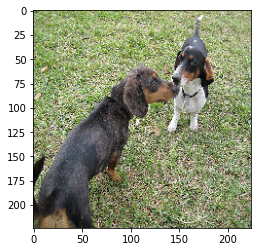

0


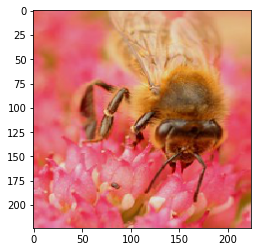

0


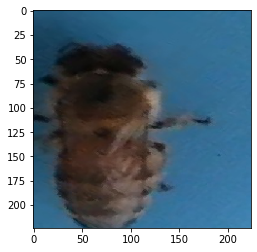

3


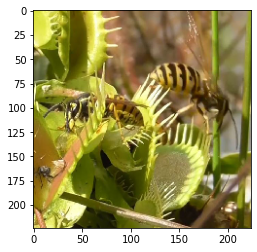

3


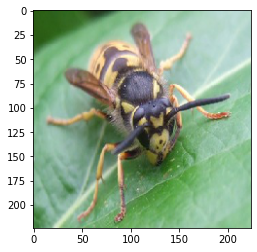

0


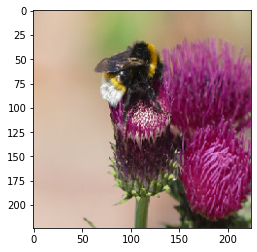

3


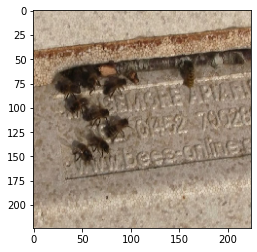

0


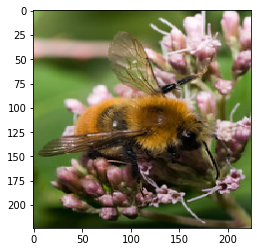

0


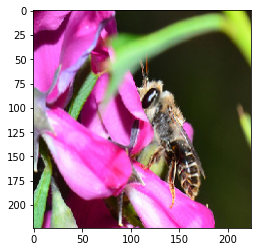

0


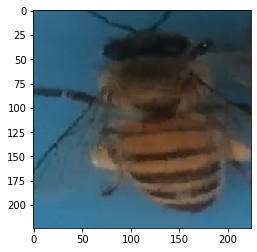

1


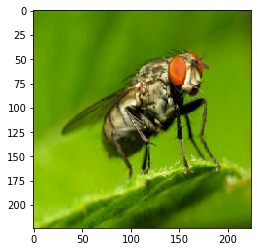

0


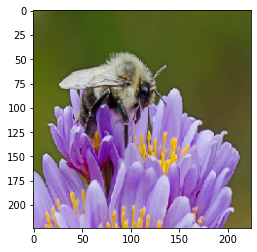

2


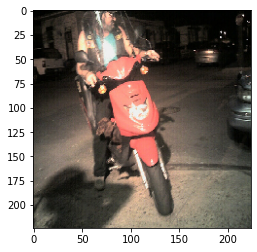

0


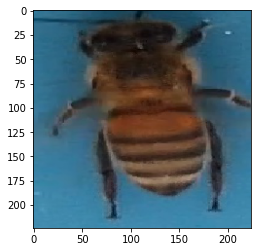

2


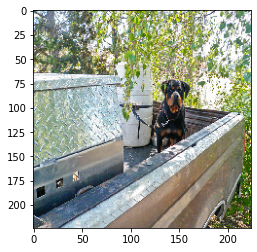

3


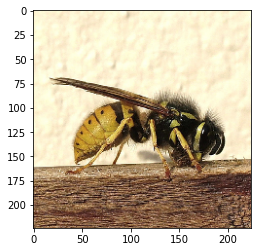

1


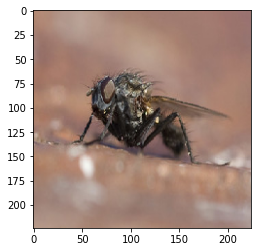

2


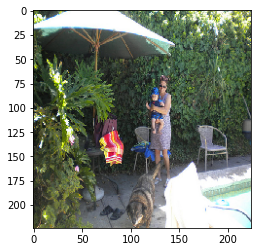

1


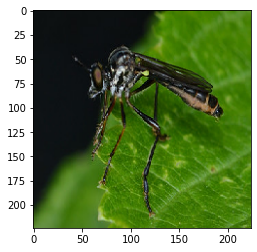

3


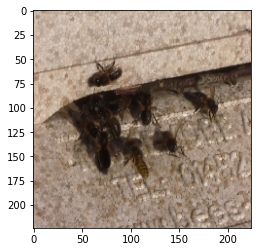

1


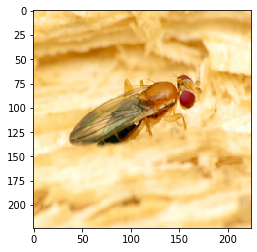

1


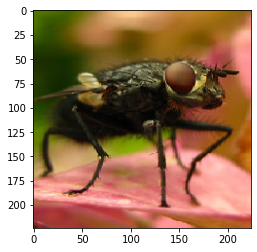

3


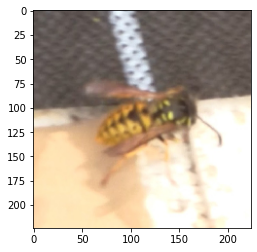

0


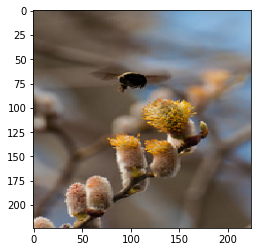

3


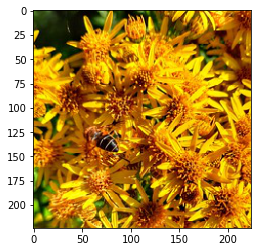

3


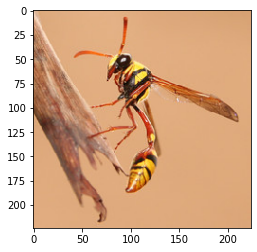

2


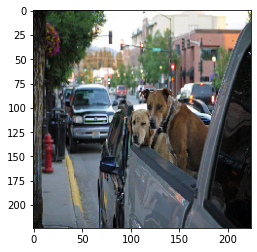

0


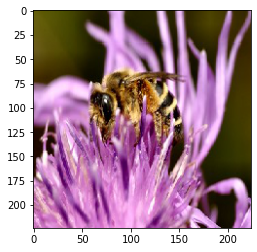

0


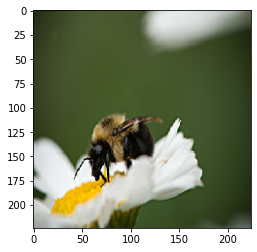

3


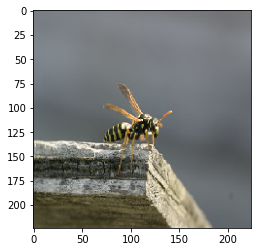

3


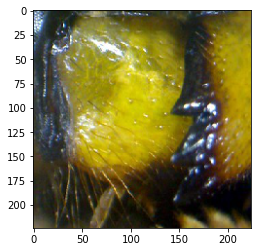

1


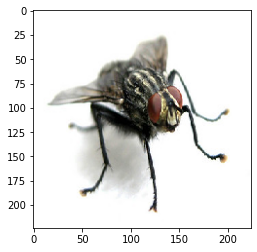

1


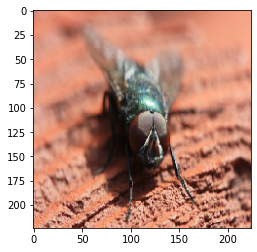

3


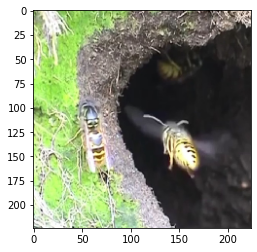

3


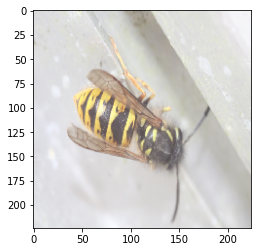

1


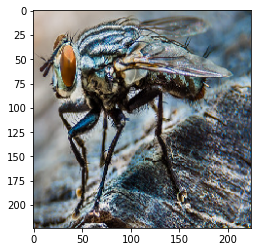

3


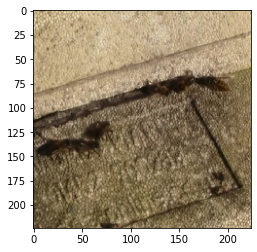

0


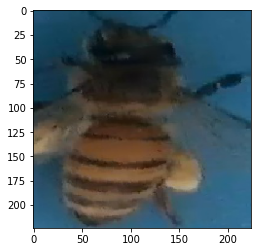

3


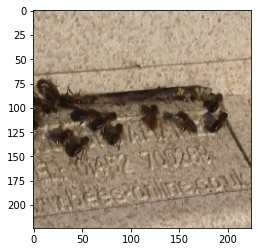

0


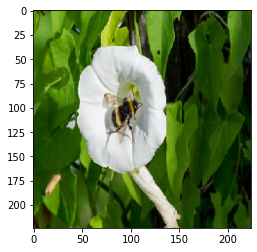

3


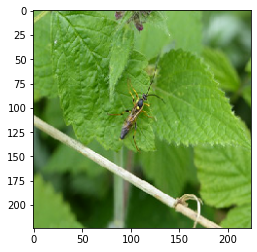

3


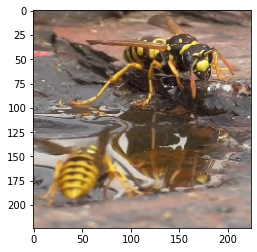

2


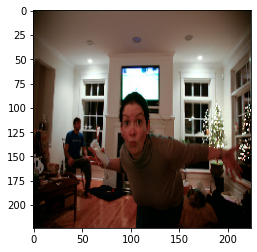

1


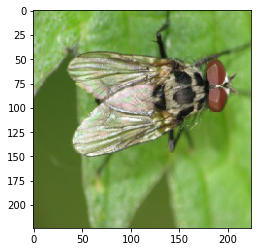

0


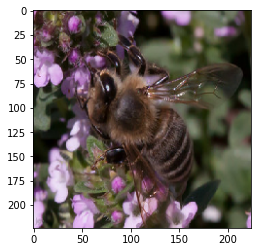

3


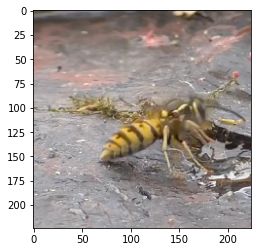

In [ ]:
# for i in range(3):
#     x_tt, y_tt = next(train_generator)
#     for j in range(20):
#         print(np.argmax(y_tt[j]))
#         plt.imshow(x_tt[j])
#         plt.show()

In [ ]:
model.save("drive/My Drive/Kaggle-Pratice/beeorwasp/Bee_Wasp.h5")

In [ ]:
from tensorflow.keras.models import load_model
load = load_model("drive/My Drive/Kaggle-Pratice/beeorwasp/Bee_Wasp.h5")

In [ ]:
a = []
img_size = 224
for x in final_validation["path"]:
    img = load_img(x, target_size = (img_size,img_size))
    img = np.array(img)
    img = img / 255
    a.append(img)
    # print(img.shape)
bb = np.array(a)
bb.shape

(1763, 224, 224, 3)

In [ ]:
from tensorflow.keras.utils import to_categorical
aa = []
for x in final_validation["answer"]:
    aa.append(int(x))
ccc = np.array(aa)
cc = to_categorical(ccc, num_classes = 4)
cc.shape

(1763, 4)

In [ ]:
model.evaluate(x = bb, y = cc)

56/56 [==============================] - 16s 281ms/step - loss: 0.4555 - accuracy: 0.8400


[0.45551589131355286, 0.8400453925132751]

In [ ]:
# model.evaluate_generator(final_generator, steps = 89)

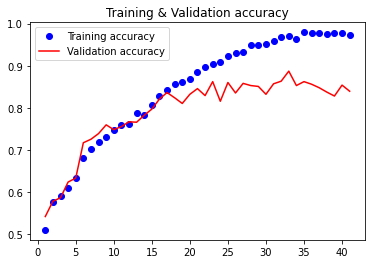

In [ ]:
acc = loss.history["accuracy"]
val_acc = loss.history["val_accuracy"]

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "r", label = "Validation accuracy")
plt.title("Training & Validation accuracy")
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(bb, verbose = 2)

pre = np.argmax(prediction, axis = -1)
pre


56/56 - 16s


array([0, 0, 0, ..., 3, 2, 2])

In [ ]:
from sklearn.metrics import  confusion_matrix

true = ccc
mat = confusion_matrix(true, pre)

CM = pd.DataFrame(mat, 
       columns=["{}(預測)".format(trans[i]) for i in range(4)],
       index=["{}(真實)".format(trans[i]) for i in range(4)])
CM

Bee(預測)  Insect(預測)  Other(預測)  Wasp(預測)
Bee(真實)         419          36          3        46
Insect(真實)       30         290          0        56
Other(真實)         1           0        114        15
Wasp(真實)         45          37         13       658

In [ ]:
print("Bee準確率(%) = ", round(CM["Bee(預測)"][0]/sum(CM["Bee(預測)"]),3)*100)
print("Insect準確率(%) = ", round(CM["Insect(預測)"][1]/sum(CM["Insect(預測)"]),3)*100)
print("Other準確率(%) = ", round(CM["Other(預測)"][2]/sum(CM["Other(預測)"]),3)*100)
print("Wasp準確率(%) = ", round(CM["Wasp(預測)"][3]/sum(CM["Wasp(預測)"]),3)*100)

Bee準確率(%) =  84.6
Insect準確率(%) =  79.9
Other準確率(%) =  87.7
Wasp準確率(%) =  84.89999999999999


輸入網址:https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTHetjCNwAUqpP1jhnLoHgxNTrrsNRFTDhIZQ&usqp=CAU
[0.18137915 0.07701302 0.02520596 0.7164018 ]
Bee 的機率: 0.181
Insect 的機率: 0.077
Other 的機率: 0.025
Wasp 的機率: 0.716
最高機率: Wasp


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


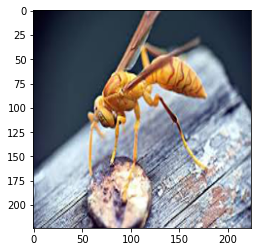

In [ ]:
import requests
from PIL import Image

url = input("輸入網址:")
# stream=True: 檔案傳回來, 不加純文字
# stream=True: response.raw stream=False: response.text
# verify=False: 別跟我說不安全
response = requests.get(url, stream = True, verify = False)

# index = random.randint(0, final_validation.shape[0])
# print(final_validation['path'][index])

# img = Image.open(final_validation['path'][index]).resize((224, 224))
img = Image.open(response.raw).resize((224, 224))
test = np.array(img).reshape(1, 224, 224, 3) / 255
p = model.predict(test)[0]
print(p)
for n, prob in zip(trans, p):
    print(n, "的機率:", round(prob, 3))
ans = model.predict_classes(test)[0]
print("最高機率:", trans[ans])
plt.imshow(img)